In [8]:
from algorithm_implementation import *
from graph_generator import *
import matplotlib as plt

In [13]:
#The values of n and k can be changed in order to draw more conclusions
n = 100
k_values = list(range(0, 21, 2))

algorithms = [indegree, pagerank, hits]

graphs = []

random_graph = generate_random_graph(n, 0.5)
random_graph.name = "Random Graph"
graphs.append(random_graph)

regular_graph = generate_random_regular_graph(n, n - 7)
regular_graph.name = "Regular Graph"
graphs.append(regular_graph)

scale_free_graph = generate_scale_free_graph(n, n-7)
scale_free_graph.name = "Scale-free Graph"
graphs.append(scale_free_graph)

small_world_graph = generate_small_world_graph(n, 5, 0.75)
small_world_graph.name = "Small World Graph"
graphs.append(small_world_graph)

hierarchical_graph = generate_hierarchical_graph(random.randint(1, n), random.randint(1, n))
hierarchical_graph.name = "Hierarchical Graph"
graphs.append(hierarchical_graph)

completed_graph = generate_complete_graph(n)
completed_graph.name = "Completed Graph"
graphs.append(completed_graph)

grid_graph = generate_grid_graph(random.randint(1, n), random.randint(1, n))
grid_graph.name = "Grid Graph"
graphs.append(grid_graph)

cyclic_graph = generate_cyclic_graph(n)
cyclic_graph.name = "Cyclic Graph"
graphs.append(cyclic_graph)

bipartite_graph = generate_bipartite_graph(n)
bipartite_graph.name = "Bipartite Graph"
graphs.append(bipartite_graph)


#### What is the largest change in the rank vector, for each algorithm, that you can cause by making a change of size k in any graph of n nodes?

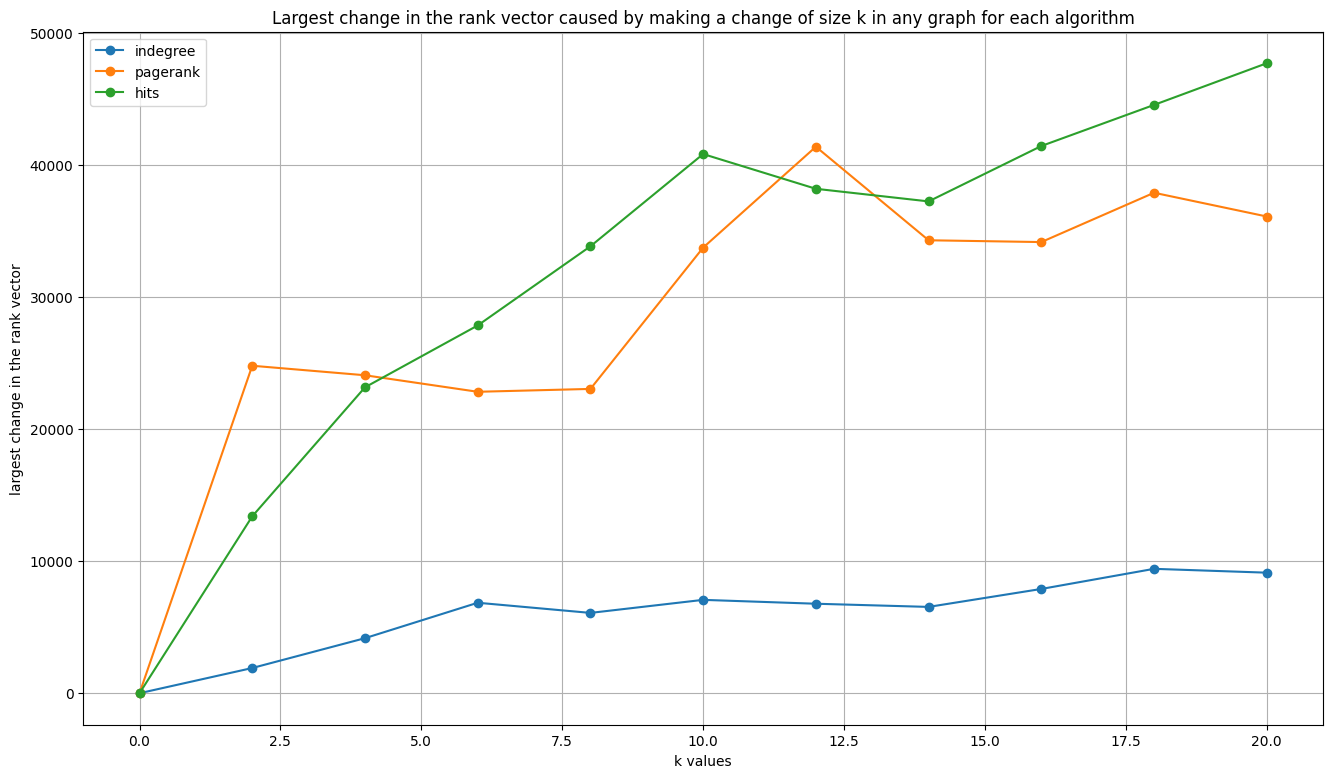

In [14]:
plt.figure(figsize=(16, 9))

for algorithm in algorithms:
    values = []

    for k in k_values:
        graph_changes = []

        for g in graphs:
            if algorithm == hits:
                rank1 = algorithm(g)
            else:
                rank1 = ranks(algorithm(g))
            g1 = make_change(g, k)
            if algorithm == hits:
                rank2 = algorithm(g1)
            else:
                rank2 = ranks(algorithm(g1))
            graph_changes.append(diff_ranks(rank1, rank2))

        values.append(max(graph_changes))

    plt.plot(k_values, values, marker = 'o', label = algorithm.__name__)

plt.xlabel("k values")
plt.ylabel("largest change in the rank vector")
plt.legend()
plt.title("Largest change in the rank vector caused by making a change of size k in any graph for each algorithm")
plt.grid(True)
plt.show()

#### Conclusion

From these plots we can conclude that for all three algorithms the differences between
the ranks is higher for the grid graph and for the hierarchical one, in the case of HITS
and In-Degree. We can also see that for the grid graph the highest difference in
rankings that we obtained is different across the three algorithms, with In-Degree having
above 3000, PageRank above 7000 and HITS above 12000. This hints us that HITS is
the least stable out of the three algorithms, and In-Degree is also more stable than
PageRank. Also, to answer the initial question, we can say that the grid graph is the
most vulnerable graph for all three algorithms, and hierarchical is also more vulnerable
for HITS and In-Degree.